In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("heart_cleveland.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age          297 non-null int64
sex          297 non-null int64
cp           297 non-null int64
trestbps     297 non-null int64
chol         297 non-null int64
fbs          297 non-null int64
restecg      297 non-null int64
thalach      297 non-null int64
exang        297 non-null int64
oldpeak      297 non-null float64
slope        297 non-null int64
ca           297 non-null int64
thal         297 non-null int64
condition    297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [14]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [16]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [221]:
l=list(df.columns)
l.remove('condition')
print(l)
x=df[l]
y=df['condition']
print(x)
print(y)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2    

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=20)

In [223]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [224]:
y_pred=model.predict(x_test)
print(y_pred)

[1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0]


In [225]:
score = accuracy_score(y_pred,y_test)
print(score)

0.8333333333333334


In [226]:
new_data = [[65,1,0,138,282,1,2,174,0,1.4,1,1,0]]
# new=[[35,1,3,126,282,0,2,156,1,0.0,0,0,2]]
# print(model.predict(new))
print(model.predict(new_data))

[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/tmp/ipykernel_4386/600946403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['y_plot']=y


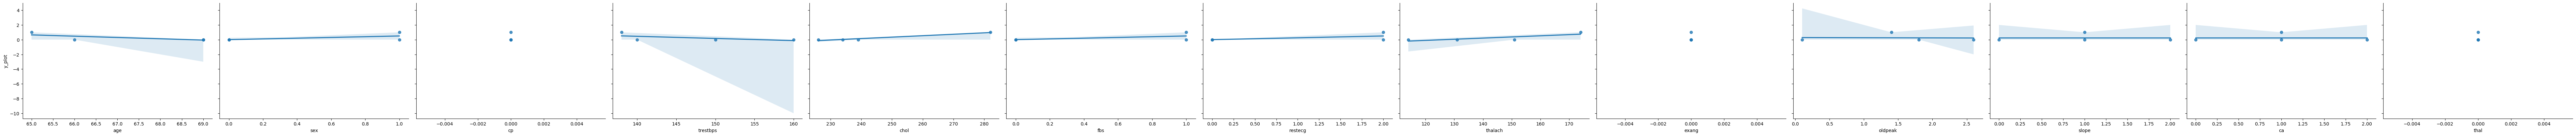

In [227]:
Data=x[:4]
Data['y_plot']=y

sns.pairplot(Data,y_vars='y_plot',x_vars=l,kind="reg",height=4 ,aspect=1.5)
plt.show()

In [212]:
accuracies=[]
dropped_features=[]
while x_train.shape[1]>1:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)
    
    feature_imp = np.abs(model.coef_[0])
    least_imp_idx = np.argmin(feature_imp)
    
    least_imp_feature = x_train.columns[least_imp_idx]
    
    x_train=x_train.drop(least_imp_feature,axis=1)
    x_test=x_test.drop(least_imp_feature,axis=1)
    
    dropped_features.append(least_imp_feature)
    
for feature,accuracy in zip(dropped_features,accuracies):
    print(f"'{feature}' - Accuracy: {accuracy:.2f}")

'chol' - Accuracy: 0.83
'trestbps' - Accuracy: 0.83
'age' - Accuracy: 0.83
'thalach' - Accuracy: 0.83
'restecg' - Accuracy: 0.82
'oldpeak' - Accuracy: 0.82
'cp' - Accuracy: 0.80
'fbs' - Accuracy: 0.80
'thal' - Accuracy: 0.78
'slope' - Accuracy: 0.75
'ca' - Accuracy: 0.68
'sex' - Accuracy: 0.72


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che